In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
url_jan2017_onwards = "f1765b54-a209-4718-8d38-a39237f502b3"
url_jan2015todec2016 = "1b702208-44bf-4829-b620-4615ee19b57c"
url_mar2012todec2014 = "83b2fc37-ce8c-4df4-968b-370fd818138b"
url_2000tofeb2012 = "8c00bf08-9124-479e-aeca-7cc411d884c4"
url_1990to1999 = "adbbddd3-30e2-445f-a123-29bee150a6fe"
url_base = "https://data.gov.sg/api/action/datastore_search?resource_id="

In [3]:
urls = [url_1990to1999,url_2000tofeb2012, url_mar2012todec2014, url_jan2015todec2016, url_jan2017_onwards]

In [4]:
query = ""

In [5]:
url_query = url_base + urls[0] + query

In [6]:
url_query

'https://data.gov.sg/api/action/datastore_search?resource_id=adbbddd3-30e2-445f-a123-29bee150a6fe'

In [7]:
import requests
response = requests.get(url_query)
# inspecting the response
# appears that we should be expecting a total of 287196 results
print(response.text)

{"help": "https://data.gov.sg/api/3/action/help_show?name=datastore_search", "success": true, "result": {"resource_id": "adbbddd3-30e2-445f-a123-29bee150a6fe", "fields": [{"type": "int4", "id": "_id"}, {"type": "text", "id": "month"}, {"type": "text", "id": "town"}, {"type": "text", "id": "flat_type"}, {"type": "text", "id": "block"}, {"type": "text", "id": "street_name"}, {"type": "text", "id": "storey_range"}, {"type": "numeric", "id": "floor_area_sqm"}, {"type": "text", "id": "flat_model"}, {"type": "numeric", "id": "lease_commence_date"}, {"type": "numeric", "id": "resale_price"}], "records": [{"town": "ANG MO KIO", "flat_type": "1 ROOM", "flat_model": "IMPROVED", "floor_area_sqm": "31", "street_name": "ANG MO KIO AVE 1", "resale_price": "9000", "month": "1990-01", "lease_commence_date": "1977", "storey_range": "10 TO 12", "_id": 1, "block": "309"}, {"town": "ANG MO KIO", "flat_type": "1 ROOM", "flat_model": "IMPROVED", "floor_area_sqm": "31", "street_name": "ANG MO KIO AVE 1", "re

In [8]:
import json
data = json.loads(response.text)
# information is found in result, records
data['result']['records']

[{'town': 'ANG MO KIO',
  'flat_type': '1 ROOM',
  'flat_model': 'IMPROVED',
  'floor_area_sqm': '31',
  'street_name': 'ANG MO KIO AVE 1',
  'resale_price': '9000',
  'month': '1990-01',
  'lease_commence_date': '1977',
  'storey_range': '10 TO 12',
  '_id': 1,
  'block': '309'},
 {'town': 'ANG MO KIO',
  'flat_type': '1 ROOM',
  'flat_model': 'IMPROVED',
  'floor_area_sqm': '31',
  'street_name': 'ANG MO KIO AVE 1',
  'resale_price': '6000',
  'month': '1990-01',
  'lease_commence_date': '1977',
  'storey_range': '04 TO 06',
  '_id': 2,
  'block': '309'},
 {'town': 'ANG MO KIO',
  'flat_type': '1 ROOM',
  'flat_model': 'IMPROVED',
  'floor_area_sqm': '31',
  'street_name': 'ANG MO KIO AVE 1',
  'resale_price': '8000',
  'month': '1990-01',
  'lease_commence_date': '1977',
  'storey_range': '10 TO 12',
  '_id': 3,
  'block': '309'},
 {'town': 'ANG MO KIO',
  'flat_type': '1 ROOM',
  'flat_model': 'IMPROVED',
  'floor_area_sqm': '31',
  'street_name': 'ANG MO KIO AVE 1',
  'resale_pric

In [9]:
data = data['result']['records']

In [10]:
# only pulls out 100 at a time
pd.DataFrame(data).shape

(100, 11)

In [11]:
query = "&limit=500000"

In [12]:
url_query = url_base + urls[0] + query

In [13]:
# attempting to retrieve all records from one of the url
response = requests.get(url_query)
data = json.loads(response.text)
data = data['result']['records']
print(pd.DataFrame(data).shape)

(287196, 11)


In [14]:
def retrieve_records(url_query:str):
    """returns a Dataframe of the full records up to a hard limit of 
    500,000 records available in the response

    Parameters
    ----------
    url_query : str
        url of the query
    
    returns: pd.DataFrame
        Records of the results
    """
    response = requests.get(url_query)
    data = json.loads(response.text)
    data = data['result']['records']
    # data = pd.DataFrame(data)
    return data

In [15]:
urls_w_query = [url_base + url + query for url in urls]

In [16]:
list_of_results = []
for url in urls_w_query:
    result = retrieve_records(url)
    list_of_results.append(result)

In [17]:
data = pd.DataFrame(list_of_results[0])

In [18]:
for result in list_of_results:
    rows = 0
    data = pd.DataFrame(result)
    rows += data.shape[0]
    print(f'Columns result is {data.columns}')

print(f'Total rows is {rows}')

Columns result is Index(['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'street_name',
       'resale_price', 'month', 'lease_commence_date', 'storey_range', '_id',
       'block'],
      dtype='object')
Columns result is Index(['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'street_name',
       'resale_price', 'month', 'lease_commence_date', 'storey_range', '_id',
       'block'],
      dtype='object')
Columns result is Index(['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'street_name',
       'resale_price', 'month', 'lease_commence_date', 'storey_range', '_id',
       'block'],
      dtype='object')
Columns result is Index(['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'street_name',
       'resale_price', 'month', 'remaining_lease', 'lease_commence_date',
       'storey_range', '_id', 'block'],
      dtype='object')
Columns result is Index(['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'street_name',
       'resale_price', 'month', 'remaining_lease

In [19]:
# I am unable to merge everything at a go since there is an additional column "remaining lease" in some data
# however the remaining lease should be able to be calculated from the difference between 99 years 
# (total lease) - (date of transaction - lease commence date)
# so the remaining_lease will be dropped.

In [20]:
df_part1 = pd.concat((
pd.DataFrame(list_of_results[0]),
pd.DataFrame(list_of_results[1]),
pd.DataFrame(list_of_results[2])), axis=0)

In [21]:
df_part2 = pd.concat((
pd.DataFrame(list_of_results[3]),
pd.DataFrame(list_of_results[4])), axis=0)

In [22]:
df_part1.shape

(709050, 11)

In [23]:
df_part1.columns

Index(['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'street_name',
       'resale_price', 'month', 'lease_commence_date', 'storey_range', '_id',
       'block'],
      dtype='object')

In [24]:
df_part2.shape

(163539, 12)

In [25]:
df_part2.columns

Index(['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'street_name',
       'resale_price', 'month', 'remaining_lease', 'lease_commence_date',
       'storey_range', '_id', 'block'],
      dtype='object')

In [26]:
# I changed my mind I will create the remaining_lease instead of dropping the remaining_lease from
# the other dataframe

In [27]:
df_part1.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,lease_commence_date,storey_range,_id,block
0,ANG MO KIO,1 ROOM,IMPROVED,31,ANG MO KIO AVE 1,9000,1990-01,1977,10 TO 12,1,309
1,ANG MO KIO,1 ROOM,IMPROVED,31,ANG MO KIO AVE 1,6000,1990-01,1977,04 TO 06,2,309
2,ANG MO KIO,1 ROOM,IMPROVED,31,ANG MO KIO AVE 1,8000,1990-01,1977,10 TO 12,3,309
3,ANG MO KIO,1 ROOM,IMPROVED,31,ANG MO KIO AVE 1,6000,1990-01,1977,07 TO 09,4,309
4,ANG MO KIO,3 ROOM,NEW GENERATION,73,ANG MO KIO AVE 1,47200,1990-01,1976,04 TO 06,5,216


In [28]:
df_part1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709050 entries, 0 to 52202
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   town                 709050 non-null  object
 1   flat_type            709050 non-null  object
 2   flat_model           709050 non-null  object
 3   floor_area_sqm       709050 non-null  object
 4   street_name          709050 non-null  object
 5   resale_price         709050 non-null  object
 6   month                709050 non-null  object
 7   lease_commence_date  709050 non-null  object
 8   storey_range         709050 non-null  object
 9   _id                  709050 non-null  int64 
 10  block                709050 non-null  object
dtypes: int64(1), object(10)
memory usage: 64.9+ MB


In [29]:
df_part1['remaining_lease'] = 99 - (pd.to_datetime(df_part1['month']).dt.year - df_part1['lease_commence_date'].astype(int) )

In [30]:
df_part1.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,lease_commence_date,storey_range,_id,block,remaining_lease
0,ANG MO KIO,1 ROOM,IMPROVED,31,ANG MO KIO AVE 1,9000,1990-01,1977,10 TO 12,1,309,86
1,ANG MO KIO,1 ROOM,IMPROVED,31,ANG MO KIO AVE 1,6000,1990-01,1977,04 TO 06,2,309,86
2,ANG MO KIO,1 ROOM,IMPROVED,31,ANG MO KIO AVE 1,8000,1990-01,1977,10 TO 12,3,309,86
3,ANG MO KIO,1 ROOM,IMPROVED,31,ANG MO KIO AVE 1,6000,1990-01,1977,07 TO 09,4,309,86
4,ANG MO KIO,3 ROOM,NEW GENERATION,73,ANG MO KIO AVE 1,47200,1990-01,1976,04 TO 06,5,216,85


In [31]:
df_part2.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block
0,ANG MO KIO,3 ROOM,Improved,60,ANG MO KIO AVE 4,255000,2015-01,70,1986,07 TO 09,1,174
1,ANG MO KIO,3 ROOM,New Generation,68,ANG MO KIO AVE 10,275000,2015-01,65,1981,01 TO 03,2,541
2,ANG MO KIO,3 ROOM,New Generation,69,ANG MO KIO AVE 4,285000,2015-01,64,1980,01 TO 03,3,163
3,ANG MO KIO,3 ROOM,New Generation,68,ANG MO KIO AVE 10,290000,2015-01,63,1979,01 TO 03,4,446
4,ANG MO KIO,3 ROOM,New Generation,68,ANG MO KIO AVE 10,290000,2015-01,64,1980,07 TO 09,5,557


In [32]:
# Rearranging cols so that the concatation will work later
df = df_part1[['remaining_lease']+ [col for col in df_part1.columns if col != 'remaining_lease']]
df2 = df_part2[['remaining_lease']+ [col for col in df_part2.columns if col != 'remaining_lease']]

In [33]:
df.head()

,remaining_lease,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,lease_commence_date,storey_range,_id,block
0,86,ANG MO KIO,1 ROOM,IMPROVED,31,ANG MO KIO AVE 1,9000,1990-01,1977,10 TO 12,1,309
1,86,ANG MO KIO,1 ROOM,IMPROVED,31,ANG MO KIO AVE 1,6000,1990-01,1977,04 TO 06,2,309
2,86,ANG MO KIO,1 ROOM,IMPROVED,31,ANG MO KIO AVE 1,8000,1990-01,1977,10 TO 12,3,309
3,86,ANG MO KIO,1 ROOM,IMPROVED,31,ANG MO KIO AVE 1,6000,1990-01,1977,07 TO 09,4,309
4,85,ANG MO KIO,3 ROOM,NEW GENERATION,73,ANG MO KIO AVE 1,47200,1990-01,1976,04 TO 06,5,216


In [34]:
df2.head()

,remaining_lease,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,lease_commence_date,storey_range,_id,block
0,70,ANG MO KIO,3 ROOM,Improved,60,ANG MO KIO AVE 4,255000,2015-01,1986,07 TO 09,1,174
1,65,ANG MO KIO,3 ROOM,New Generation,68,ANG MO KIO AVE 10,275000,2015-01,1981,01 TO 03,2,541
2,64,ANG MO KIO,3 ROOM,New Generation,69,ANG MO KIO AVE 4,285000,2015-01,1980,01 TO 03,3,163
3,63,ANG MO KIO,3 ROOM,New Generation,68,ANG MO KIO AVE 10,290000,2015-01,1979,01 TO 03,4,446
4,64,ANG MO KIO,3 ROOM,New Generation,68,ANG MO KIO AVE 10,290000,2015-01,1980,07 TO 09,5,557


In [35]:
df_combined = pd.concat((df, df2))

In [36]:
df_combined.shape

(872589, 12)

In [37]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872589 entries, 0 to 126385
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   remaining_lease      872589 non-null  object
 1   town                 872589 non-null  object
 2   flat_type            872589 non-null  object
 3   flat_model           872589 non-null  object
 4   floor_area_sqm       872589 non-null  object
 5   street_name          872589 non-null  object
 6   resale_price         872589 non-null  object
 7   month                872589 non-null  object
 8   lease_commence_date  872589 non-null  object
 9   storey_range         872589 non-null  object
 10  _id                  872589 non-null  int64 
 11  block                872589 non-null  object
dtypes: int64(1), object(11)
memory usage: 86.5+ MB


In [38]:
# we can drop id and lease commence date 
# lease commence date since the feature is already present in remaining lease

In [39]:
# make a copy first
df_original = df_combined.copy()

In [40]:
df_combined.drop(columns=['_id','lease_commence_date','street_name','block'], inplace=True)

In [41]:
# cleanup for remaining_lease as the later ones have months attached to them
# I will only take the first 2 values for the years
# cast to str and take the first 2 values for years and then cast them back to int later
df_combined['remaining_lease'].astype(str).str[:2].astype(int)

0         86
1         86
2         86
3         86
4         85
          ..
126381    64
126382    64
126383    65
126384    64
126385    64
Name: remaining_lease, Length: 872589, dtype: int32

In [42]:
# Conversion
df_combined['remaining_lease'] = df_combined['remaining_lease'].astype(str).str[:2].astype(int)
df_combined['floor_area_sqm'] = df_combined['floor_area_sqm'].astype(float)
df_combined['resale_price'] = df_combined['resale_price'].astype(float)
df_combined['month'] = pd.to_datetime(df_combined['month']).dt.year

In [43]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872589 entries, 0 to 126385
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   remaining_lease  872589 non-null  int32  
 1   town             872589 non-null  object 
 2   flat_type        872589 non-null  object 
 3   flat_model       872589 non-null  object 
 4   floor_area_sqm   872589 non-null  float64
 5   resale_price     872589 non-null  float64
 6   month            872589 non-null  int64  
 7   storey_range     872589 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 56.6+ MB


array([[<AxesSubplot:title={'center':'remaining_lease'}>,
        <AxesSubplot:title={'center':'floor_area_sqm'}>],
       [<AxesSubplot:title={'center':'resale_price'}>,
        <AxesSubplot:title={'center':'month'}>]], dtype=object)

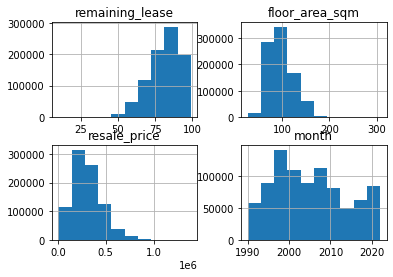

In [44]:
df_combined.hist()

In [45]:
df_combined.select_dtypes(include='object').describe().T

,count,unique,top,freq
town,872589,27,TAMPINES,76413
flat_type,872589,8,4 ROOM,328771
flat_model,872589,33,Model A,173415
storey_range,872589,25,04 TO 06,220176


In [46]:
df_combined['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft'], dtype=object)

In [47]:
# I think the flat model should not be such a big deal. Ill drop it
df_combined.drop(columns='flat_model', inplace=True)

In [48]:
df_combined['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [49]:
df_combined['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'GEYLANG',
       'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [50]:
df_combined['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [51]:
df_combined['flat_type'] = df_combined['flat_type'].str.replace('MULTI-GENERATION','MULTI GENERATION')

[Text(0, 0, 'ANG MO KIO'),
 Text(1, 0, 'BEDOK'),
 Text(2, 0, 'BISHAN'),
 Text(3, 0, 'BUKIT BATOK'),
 Text(4, 0, 'GEYLANG'),
 Text(5, 0, 'BUKIT MERAH'),
 Text(6, 0, 'BUKIT TIMAH'),
 Text(7, 0, 'CENTRAL AREA'),
 Text(8, 0, 'CHOA CHU KANG'),
 Text(9, 0, 'CLEMENTI'),
 Text(10, 0, 'HOUGANG'),
 Text(11, 0, 'JURONG EAST'),
 Text(12, 0, 'JURONG WEST'),
 Text(13, 0, 'KALLANG/WHAMPOA'),
 Text(14, 0, 'MARINE PARADE'),
 Text(15, 0, 'QUEENSTOWN'),
 Text(16, 0, 'SENGKANG'),
 Text(17, 0, 'SERANGOON'),
 Text(18, 0, 'TAMPINES'),
 Text(19, 0, 'TOA PAYOH'),
 Text(20, 0, 'WOODLANDS'),
 Text(21, 0, 'YISHUN'),
 Text(22, 0, 'LIM CHU KANG'),
 Text(23, 0, 'SEMBAWANG'),
 Text(24, 0, 'BUKIT PANJANG'),
 Text(25, 0, 'PASIR RIS'),
 Text(26, 0, 'PUNGGOL')]

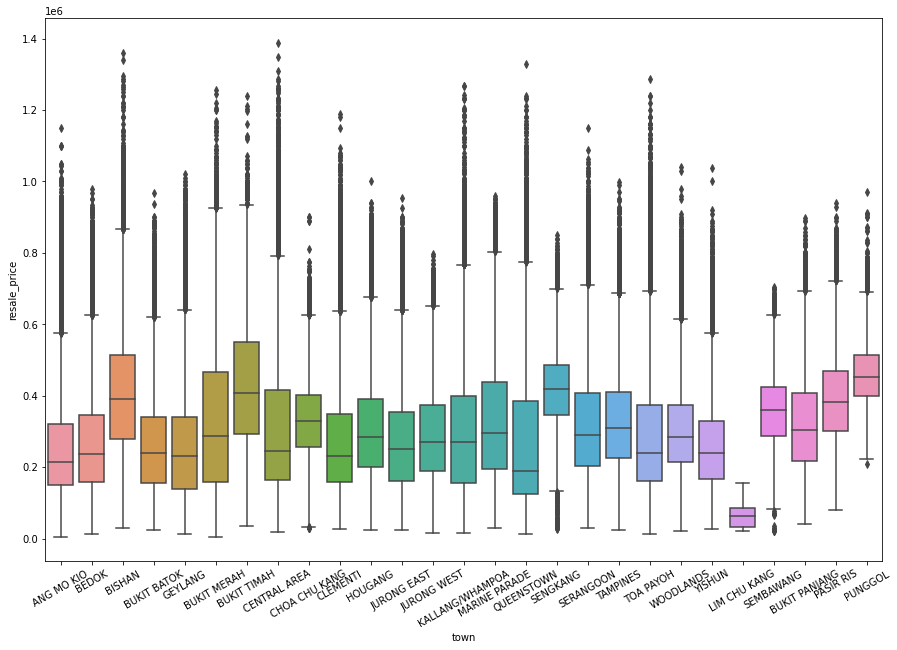

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,10))
ax = sns.boxplot(x='town', y='resale_price', data=df_combined)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [53]:
df_combined.head()

,remaining_lease,town,flat_type,floor_area_sqm,resale_price,month,storey_range
0,86,ANG MO KIO,1 ROOM,31.0,9000.0,1990,10 TO 12
1,86,ANG MO KIO,1 ROOM,31.0,6000.0,1990,04 TO 06
2,86,ANG MO KIO,1 ROOM,31.0,8000.0,1990,10 TO 12
3,86,ANG MO KIO,1 ROOM,31.0,6000.0,1990,07 TO 09
4,85,ANG MO KIO,3 ROOM,73.0,47200.0,1990,04 TO 06


In [54]:
ordinal_ranking_flat_type = ['MULTI GENERATION','EXECUTIVE', '5 ROOM','4 ROOM', '3 ROOM','2 ROOM', '1 ROOM']
ordinal_ranking_storey_range = [ '01 TO 03','01 TO 05','04 TO 06', '06 TO 10', '07 TO 09', '10 TO 12','11 TO 15', '13 TO 15',
        '16 TO 18','16 TO 20','19 TO 21','21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30', '28 TO 30',
       '31 TO 33','31 TO 35','34 TO 36',  '37 TO 39', '36 TO 40', '40 TO 42', '43 TO 45', '46 TO 48','49 TO 51']

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

ORDINAL_FEATURES = ["storey_range","flat_type"]
CAT_FEATURES = ["town"]
NUM_FEATURES = ["remaining_lease","floor_area_sqm","month"]
TARGET = "resale_price"
# ORDINAL_FEATURES = df_combined.select_dtypes(include='object').columns.drop("town")
# NUM_FEATURES = df_combined.select_dtypes(exclude='object').columns

In [56]:
len(ordinal_ranking_storey_range)

25

In [57]:
df_combined['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [58]:
ordinal_pipe = OrdinalEncoder(categories=[ordinal_ranking_storey_range,ordinal_ranking_flat_type])
empty_ordinal_pipe = OrdinalEncoder()
cat_pipe = OneHotEncoder(drop='first', sparse=False)
num_pipe = StandardScaler()

datapipe = ColumnTransformer([
    ('cat_pipe',cat_pipe , CAT_FEATURES),
    ('num_pipe',num_pipe, NUM_FEATURES),
    ('ordinal_pipe', ordinal_pipe, ORDINAL_FEATURES)
    ])

In [59]:
OE_Flat_type = OrdinalEncoder(categories=[ordinal_ranking_flat_type])
OE_Flat_type.fit_transform(df_combined[['flat_type']])

array([[6.],
       [6.],
       [6.],
       ...,
       [0.],
       [0.],
       [0.]])

In [60]:
df_combined.head()

,remaining_lease,town,flat_type,floor_area_sqm,resale_price,month,storey_range
0,86,ANG MO KIO,1 ROOM,31.0,9000.0,1990,10 TO 12
1,86,ANG MO KIO,1 ROOM,31.0,6000.0,1990,04 TO 06
2,86,ANG MO KIO,1 ROOM,31.0,8000.0,1990,10 TO 12
3,86,ANG MO KIO,1 ROOM,31.0,6000.0,1990,07 TO 09
4,85,ANG MO KIO,3 ROOM,73.0,47200.0,1990,04 TO 06


In [61]:
y = df_combined.pop(TARGET)
X = df_combined

In [62]:
X.head()

,remaining_lease,town,flat_type,floor_area_sqm,month,storey_range
0,86,ANG MO KIO,1 ROOM,31.0,1990,10 TO 12
1,86,ANG MO KIO,1 ROOM,31.0,1990,04 TO 06
2,86,ANG MO KIO,1 ROOM,31.0,1990,10 TO 12
3,86,ANG MO KIO,1 ROOM,31.0,1990,07 TO 09
4,85,ANG MO KIO,3 ROOM,73.0,1990,04 TO 06


In [63]:
X_transform = datapipe.fit_transform(X)

In [64]:
pd.Series(X_transform[0])

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.440225
27   -2.493202
28   -1.761894
29    5.000000
30    6.000000
dtype: float64

In [65]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
ordinal_ranking_flat_type = ['MULTI GENERATION','EXECUTIVE', '5 ROOM','4 ROOM', '3 ROOM','2 ROOM', '1 ROOM']
ordinal_ranking_storey_range = [ '01 TO 03','01 TO 05','04 TO 06', '06 TO 10', '07 TO 09', '10 TO 12','11 TO 15', '13 TO 15',
        '16 TO 18','16 TO 20','19 TO 21','21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30', '28 TO 30',
       '31 TO 33','31 TO 35','34 TO 36',  '37 TO 39', '36 TO 40', '40 TO 42', '43 TO 45', '46 TO 48','49 TO 51']

class DataPipeline():

    def __init__(self):
        ORDINAL_FEATURES = ["storey_range","flat_type"]
        CAT_FEATURES = ["town"]
        NUM_FEATURES = ["remaining_lease","floor_area_sqm","month"]
        self.TARGET = "resale_price"

        ordinal_pipe = OrdinalEncoder(categories=[ordinal_ranking_storey_range,ordinal_ranking_flat_type])
        cat_pipe = OneHotEncoder(drop='first', sparse=False)
        num_pipe = StandardScaler()

        self.datapipe = ColumnTransformer([
            ('cat_pipe',cat_pipe , CAT_FEATURES),
            ('num_pipe',num_pipe, NUM_FEATURES),
            ('ordinal_pipe', ordinal_pipe, ORDINAL_FEATURES)
            ])    

    def __dropcols(self, df):
        df.drop(columns=['_id','lease_commence_date','street_name','block', 'flat_model'], inplace=True)
        return df

    def __conversions(self, df):
        df['remaining_lease'] = df['remaining_lease'].astype(str).str[:2].astype(int)
        df['floor_area_sqm'] = df['floor_area_sqm'].astype(float)
        df['resale_price'] = df['resale_price'].astype(float)
        df['month'] = pd.to_datetime(df['month']).dt.year

        return df

    def __preprocess(self,df):
        df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION','MULTI GENERATION')
        return df

    def __split(self, df:pd.DataFrame):
        y = df.pop(self.TARGET)
        X = df


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)

        return X_train, X_test, y_train, y_test

    def __run_ct(self, X_train, X_test):
        X_train = self.datapipe.fit_transform(X_train)
        X_test = self.datapipe.transform(X_test)

        return X_train, X_test

    def transform(self, df, y= None):
        """preprocess, transform and then split the dataset

        Parameters
        ----------
        X : pd.DataFrame
            the entire DataFrame
        y : None, Ignored
        """
        df = self.__dropcols(df)
        df = self.__conversions(df)
        df = self.__preprocess(df)
        X_train, X_test, y_train, y_test = self.__split(df)

        X_train, X_test = self.__run_ct(X_train, X_test)

        return X_train, X_test, y_train, y_test



In [66]:
df_original_copy  = df_original.copy()

In [67]:
datapipeline = DataPipeline()
X_train, X_test, y_train, y_test = datapipeline.transform(df_original_copy)

In [68]:
from src.datapipeline import DataPipeline

df_original_copy_2 = df_original.copy()

datapipeline = DataPipeline()
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = datapipeline.transform(df_original_copy_2)

In [69]:
# Check to see if the datapipeline yields the same results

In [70]:
np.array_equal(X_train, X_train_pipe)

True

In [71]:
np.array_equal(X_test, X_test_pipe)

True

In [72]:
np.array_equal(y_train, y_train_pipe)

True

In [73]:
np.array_equal(y_test, y_test_pipe)

True